## Connected components

- Number of connected components
- Size of the largest connected component
- Average size of the connected components
- Size of the smalles connected component
- Sizes of connected components for all pathways

In [1]:
import networkx as nx
import pandas as pd
import seaborn as sns

import config
from config import GRAPHS_PATH
from lib.networks import get_interactomes

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

config.set_root_wd()

Working directory: c:\git\pathwayanalysisplatform\proteoformnetworks


In [2]:
interactomes = get_interactomes(GRAPHS_PATH)

In [3]:
import itertools

def getTuples(i):
    sizes = [len(c) for c in sorted(nx.connected_components(i), key=len, reverse=True)]
    d = [(i.graph["method"], i.graph["level"], s) for s in sizes]
    return d

tuples = [getTuples(i) for i in interactomes]
data = list(itertools.chain.from_iterable(tuples))
data
df_cc = pd.DataFrame(data, columns=['Method', 'Level', 'Size'])
df_cc

,Method,Level,Size
0,no_sm,genes,8869
1,no_sm,genes,93
2,no_sm,genes,16
3,no_sm,genes,12
4,no_sm,genes,12
...,...,...,...
13277,with_unique_sm,proteoforms,1
13278,with_unique_sm,proteoforms,1
13279,with_unique_sm,proteoforms,1
13280,with_unique_sm,proteoforms,1


c:\git\pathwayanalysisplatform\proteoformnetworks\venv\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\git\pathwayanalysisplatform\proteoformnetworks\venv\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


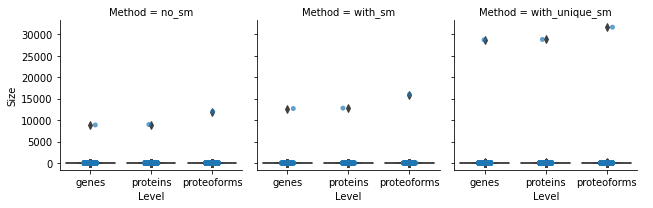

In [4]:
# Requires creating a dataframe with two columns
g = sns.FacetGrid(df_cc, col="Method")

g.map(sns.stripplot, "Level", "Size", alpha=.7)
g.map(sns.boxplot, "Level", "Size")
g.add_legend()

In [5]:
import itertools

def getTuples(i):
    sizes = [len(c)/i.number_of_nodes() for c in sorted(nx.connected_components(i), key=len, reverse=True)]
    d = [(i.graph["method"], i.graph["level"], s) for s in sizes]
    return d

tuples = [getTuples(i) for i in interactomes]
data = list(itertools.chain.from_iterable(tuples))
data
df_cc = pd.DataFrame(data, columns=['Method', 'Level', 'Size'])
df_cc

,Method,Level,Size
0,no_sm,genes,0.81
1,no_sm,genes,0.01
2,no_sm,genes,0.00
3,no_sm,genes,0.00
4,no_sm,genes,0.00
...,...,...,...
13277,with_unique_sm,proteoforms,0.00
13278,with_unique_sm,proteoforms,0.00
13279,with_unique_sm,proteoforms,0.00
13280,with_unique_sm,proteoforms,0.00


c:\git\pathwayanalysisplatform\proteoformnetworks\venv\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\git\pathwayanalysisplatform\proteoformnetworks\venv\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


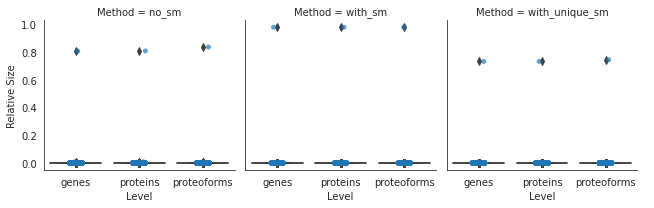

In [6]:
# Requires creating a dataframe with two columns
with sns.axes_style("white"):
    g = sns.FacetGrid(df_cc, col="Method")
g.map(sns.stripplot, "Level", "Size", alpha=.7)
g.map(sns.boxplot, "Level", "Size")
g.set_axis_labels("Level", "Relative Size")
g.add_legend()